In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:

#original_train_data=pd.read_csv("/content/drive/MyDrive/Dataset/Music Track(Open IIT 2021)/Train_data.csv")
#original_test_data=pd.read_csv("/content/drive/MyDrive/Dataset/Music Track(Open IIT 2021)/Test_data.csv")
original_train_data=pd.read_csv("https://raw.githubusercontent.com/Tulsi1/Open_IIT/main/Train_data.csv")
original_test_data=pd.read_csv("https://raw.githubusercontent.com/Tulsi1/Open_IIT/main/Test_data.csv")


In [ ]:
train_data=original_train_data.copy()
test_data=original_test_data.copy()

In [ ]:
train_data.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [ ]:
test_data.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
0,4943,0.03360,0.523,0.861,No,0.000000,0,0.1440,-3.447,Major,01-01-2014,0.0644,127.049,0.346,2014,3.8
1,16165,0.76500,0.687,0.453,No,0.000008,7,0.0897,-11.649,Major,01-04-1972,0.0335,129.987,0.830,1972,3.8
2,6774,0.36300,0.536,0.640,No,0.000000,0,0.0948,-5.862,Major,02-06-1998,0.0368,142.483,0.289,1998,4.4
3,9959,0.00463,0.890,0.617,No,0.003850,2,0.0291,-12.096,Minor,08-09-1980,0.0418,121.126,0.970,1980,3.9
4,13818,0.00187,0.555,0.943,No,0.000042,2,0.1510,-2.492,Major,17-04-2007,0.0891,165.026,0.882,2007,3.2


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12227 non-null  int64  
 1   acousticness      12227 non-null  float64
 2   danceability      12227 non-null  float64
 3   energy            12227 non-null  float64
 4   explicit          12227 non-null  object 
 5   instrumentalness  12227 non-null  float64
 6   key               12227 non-null  int64  
 7   liveness          12227 non-null  float64
 8   loudness          12227 non-null  float64
 9   mode              12227 non-null  object 
 10  release_date      12227 non-null  object 
 11  speechiness       12227 non-null  float64
 12  tempo             12227 non-null  float64
 13  valence           12227 non-null  float64
 14  year              12227 non-null  int64  
 15  duration-min      12227 non-null  float64
 16  popularity        12227 non-null  object

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4000 non-null   int64  
 1   acousticness      4000 non-null   float64
 2   danceability      4000 non-null   float64
 3   energy            4000 non-null   float64
 4   explicit          4000 non-null   object 
 5   instrumentalness  4000 non-null   float64
 6   key               4000 non-null   int64  
 7   liveness          4000 non-null   float64
 8   loudness          4000 non-null   float64
 9   mode              4000 non-null   object 
 10  release_date      4000 non-null   object 
 11  speechiness       4000 non-null   float64
 12  tempo             4000 non-null   float64
 13  valence           4000 non-null   float64
 14  year              4000 non-null   int64  
 15  duration-min      4000 non-null   float64
dtypes: float64(10), int64(3), object(3)
memory

In [ ]:
train_data.describe(include='all')

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
count,12227.000000,12227.000000,12227.000000,12227.000000,12227,12227.000000,12227.000000,12227.000000,12227.000000,12227,12227,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,3859,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Major,01-01-1961,NaN,NaN,NaN,NaN,NaN,very low
freq,NaN,NaN,NaN,NaN,10906,NaN,NaN,NaN,NaN,8487,90,NaN,NaN,NaN,NaN,NaN,3222
mean,8094.034350,0.430578,0.556353,0.522129,NaN,0.149321,5.205202,0.201365,-10.668687,NaN,NaN,0.097680,118.167495,0.525300,1984.517298,3.888133,NaN
std,4690.929822,0.366893,0.175373,0.262482,NaN,0.297954,3.526954,0.173987,5.506888,NaN,NaN,0.155895,30.200064,0.258205,25.911998,2.383133,NaN
min,1.000000,0.000001,0.000000,0.000020,NaN,0.000000,0.000000,0.014700,-43.738000,NaN,NaN,0.000000,0.000000,0.000000,1920.000000,0.200000,NaN
25%,4026.000000,0.058950,0.438000,0.303000,NaN,0.000000,2.000000,0.096200,-13.656000,NaN,NaN,0.034700,95.050500,0.321000,1966.000000,2.900000,NaN
50%,8093.000000,0.354000,0.569000,0.534000,NaN,0.000115,5.000000,0.132000,-9.584000,NaN,NaN,0.045600,116.915000,0.532000,1987.000000,3.600000,NaN
75%,12180.000000,0.805000,0.685000,0.739000,NaN,0.055650,8.000000,0.252000,-6.571500,NaN,NaN,0.078900,136.108500,0.737000,2008.000000,4.400000,NaN


In [ ]:
train_data.shape

(12227, 17)

In [ ]:
test_data.shape

(4000, 16)

In [ ]:
train_data.isnull().sum()

id                  0
acousticness        0
danceability        0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration-min        0
popularity          0
dtype: int64

In [ ]:
test_data.isnull().sum()

id                  0
acousticness        0
danceability        0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration-min        0
dtype: int64

In [ ]:
categorical_features_train=[feature for feature in train_data.columns if train_data[feature].dtypes=='O']
train_data[categorical_features_train].head()

,explicit,mode,release_date,popularity
0,No,Major,01-01-1947,very low
1,No,Major,13-11-2020,low
2,No,Minor,01-01-1950,very low
3,No,Major,30-04-1974,low
4,No,Major,01-01-1973,average


In [ ]:
for feature in categorical_features_train:
    print('The feature is {} and number of categories are {}'.format(feature,len(train_data[feature].unique())))

The feature is explicit and number of categories are 2
The feature is mode and number of categories are 2
The feature is release_date and number of categories are 3859
The feature is popularity and number of categories are 5


In [ ]:
train_data["popularity"].value_counts()

very low     3222
low          3118
average      2912
high         2606
very high     369
Name: popularity, dtype: int64

In [ ]:
cleanup_nums={"explicit":{"No":0,"Yes":1}, "mode":{"Major":1,"Minor":0}, "popularity":{"very low":0,"low":1,"average":2,"high":3,"very high":4}}
train_data.replace(cleanup_nums,inplace=True)


In [ ]:
train_data

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.03980,1947,3.0,0
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.85900,2020,2.4,1
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.70900,1950,2.6,0
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.96400,1974,2.4,1
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.78500,1973,3.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,-5.461,1,01-07-2014,0.4070,81.940,0.74400,2014,3.4,2
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,-14.014,1,01-01-1959,0.0351,134.009,0.70100,1959,2.0,4
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,-9.298,0,01-01-1984,0.0338,124.883,0.89000,1984,2.5,1
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,-26.324,1,09-01-2017,0.1180,73.234,0.00558,2017,3.1,3


In [ ]:
train_data.drop(['id','release_date'],axis=1,inplace=True)

In [ ]:
train_data.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity
0,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,1,0.0381,110.838,0.0398,1947,3.0,0
1,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,1,0.0437,152.066,0.8590,2020,2.4,1
2,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,0,0.0474,108.004,0.7090,1950,2.6,0
3,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,1,0.0368,83.636,0.9640,1974,2.4,1
4,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,1,0.0488,117.260,0.7850,1973,3.4,2


In [ ]:
X=train_data.iloc[:,:14]
y=train_data.iloc[:,-1]

In [ ]:
X.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min
0,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,1,0.0381,110.838,0.0398,1947,3.0
1,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,1,0.0437,152.066,0.8590,2020,2.4
2,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,0,0.0474,108.004,0.7090,1950,2.6
3,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,1,0.0368,83.636,0.9640,1974,2.4
4,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,1,0.0488,117.260,0.7850,1973,3.4


In [ ]:
y

0        0
1        1
2        0
3        1
4        2
        ..
12222    2
12223    4
12224    1
12225    3
12226    3
Name: popularity, Length: 12227, dtype: int64

In [ ]:
#from sklearn.preprocessing import StandardScaler
#X_train=StandardScaler().fit_transform(X_train)
#X_test=StandardScaler().fit_transform(X_test)

In [ ]:
X['total_beats']=X['tempo'] * X['duration-min']

In [ ]:
X.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,total_beats
0,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,1,0.0381,110.838,0.0398,1947,3.0,332.5140
1,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,1,0.0437,152.066,0.8590,2020,2.4,364.9584
2,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,0,0.0474,108.004,0.7090,1950,2.6,280.8104
3,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,1,0.0368,83.636,0.9640,1974,2.4,200.7264
4,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,1,0.0488,117.260,0.7850,1973,3.4,398.6840


In [ ]:
#from sklearn.preprocessing import StandardScaler
#X=StandardScaler().fit_transform(X)

In [ ]:
X = pd.DataFrame(X)
X.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,total_beats
0,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,1,0.0381,110.838,0.0398,1947,3.0,332.5140
1,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,1,0.0437,152.066,0.8590,2020,2.4,364.9584
2,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,0,0.0474,108.004,0.7090,1950,2.6,280.8104
3,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,1,0.0368,83.636,0.9640,1974,2.4,200.7264
4,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,1,0.0488,117.260,0.7850,1973,3.4,398.6840


In [ ]:
X['decade'] = pd.Series(dtype='int')

In [ ]:
X['year'][1]

2020

In [ ]:
for i in range(len(X['year'])):
  if(X['year'][i]<1931):
    X['decade'][i] = 0
  elif(X['year'][i]<1941):
    X['decade'][i] = 1
  elif(X['year'][i]<1951):
    X['decade'][i] = 2
  elif(X['year'][i]<1961):
    X['decade'][i] = 3
  elif(X['year'][i]<1971):
    X['decade'][i] = 4
  elif(X['year'][i]<1981):
    X['decade'][i] = 5
  elif(X['year'][i]<1991):
    X['decade'][i] = 6
  elif(X['year'][i]<2001):
    X['decade'][i] = 7
  elif(X['year'][i]<2011):
    X['decade'][i] = 8
  else:
    X['decade'][i] = 9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWa

In [ ]:
X['decade']

0        2.0
1        9.0
2        2.0
3        5.0
4        5.0
        ... 
12222    9.0
12223    3.0
12224    6.0
12225    9.0
12226    9.0
Name: decade, Length: 12227, dtype: float64

In [ ]:
classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier.feature_importances_

array([0.02035775, 0.01967588, 0.01983203, 0.05156099, 0.02766236,
       0.01777616, 0.01841896, 0.0226856 , 0.01823   , 0.02007597,
       0.01869063, 0.02003284, 0.17454387, 0.02342793, 0.01956552,
       0.5074635 ], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

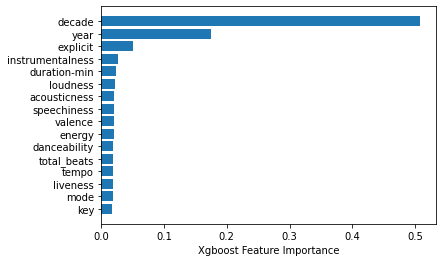

In [ ]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

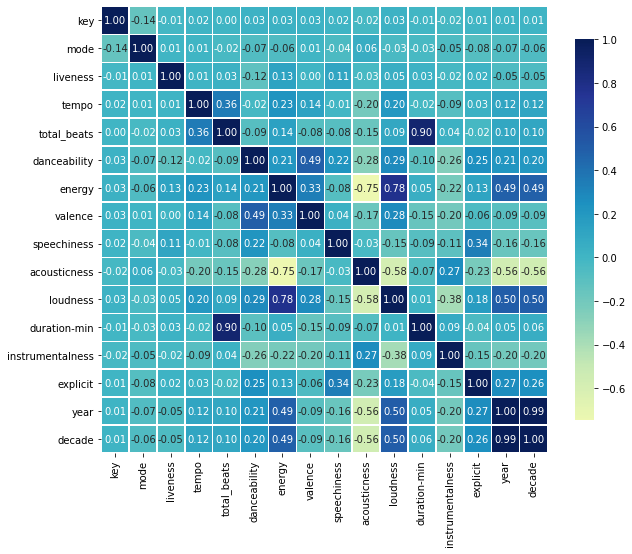

In [ ]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X[X.columns[sorted_idx]])

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=3222 (20.000%)
Class=1, n=3222 (20.000%)
Class=2, n=3222 (20.000%)
Class=3, n=3222 (20.000%)
Class=4, n=3222 (20.000%)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.949,0.235,0.0276,0.0,0.9270,5.0,0.513,-27.398,1.0,0.0381,110.838,0.0398,1947.0,3.0,332.5140,2.0
1,0.855,0.456,0.4850,0.0,0.0884,4.0,0.151,-10.046,1.0,0.0437,152.066,0.8590,2020.0,2.4,364.9584,9.0
2,0.827,0.495,0.4990,0.0,0.0000,0.0,0.401,-8.009,0.0,0.0474,108.004,0.7090,1950.0,2.6,280.8104,2.0
3,0.654,0.643,0.4690,0.0,0.1080,7.0,0.218,-15.917,1.0,0.0368,83.636,0.9640,1974.0,2.4,200.7264,5.0
4,0.738,0.705,0.3110,0.0,0.0000,5.0,0.322,-12.344,1.0,0.0488,117.260,0.7850,1973.0,3.4,398.6840,5.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 2, 3, 4, 5, 6, 8, 10, 12, 15 ],
 "n_estimators"     : [100,200,400,500,600,800,1000],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=10,verbose=3)

In [ ]:
#def timer(start_time=None):
 #   if not start_time:
  #      start_time = datetime.now()
   #     return start_time
    #elif start_time:
     #   thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
      #  tmin, tsec = divmod(temp_sec, 60)
       # print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
#from datetime import datetime

#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-f0e78ac41bef>", line 4, in <module>
    random_search.fit(X,y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 710, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1484, in _run_search
    random_state=self.random_state))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 689, in evaluate_candidates
    cv.split(X, y, groups)))
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1054, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 933, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/usr/local/lib/py

KeyboardInterrupt: ignored

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.15,
 'max_depth': 15,
 'min_child_weight': 1,
 'n_estimators': 100}

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=25)

In [ ]:
score

In [ ]:
score

array([0.6372093 , 0.61705426, 0.62790698, 0.71937984, 0.70852713,
       0.69147287, 0.70387597, 0.68527132, 0.70697674, 0.74573643,
       0.72049689, 0.68944099, 0.70186335, 0.69254658, 0.70341615,
       0.67857143, 0.70652174, 0.73136646, 0.6863354 , 0.69720497,
       0.72049689, 0.69720497, 0.70496894, 0.73291925, 0.75931677])

In [ ]:

score.mean()

0.6986432664066637

In [ ]:
classifier.fit(X_train,y_train)
y_predicted=classifier.predict(X_test)

In [ ]:
pred_prob = classifier.predict_proba(X_test)

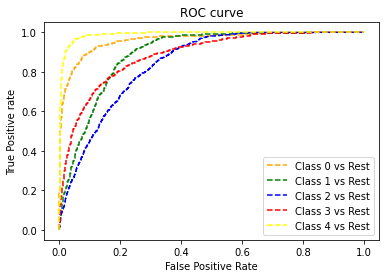

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted, digits=3))

[[766  94  39  46  10]
 [103 605 194  17   0]
 [ 35 309 490 137   7]
 [ 30 106 203 529 123]
 [  4   3  11  45 927]]
              precision    recall  f1-score   support

           0      0.817     0.802     0.809       955
           1      0.542     0.658     0.594       919
           2      0.523     0.501     0.512       978
           3      0.683     0.534     0.599       991
           4      0.869     0.936     0.901       990

    accuracy                          0.686      4833
   macro avg      0.687     0.686     0.683      4833
weighted avg      0.688     0.686     0.684      4833



In [ ]:
y_test = pd.DataFrame(y_test)
y_predicted = pd.DataFrame(y_predicted)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame(X_test)

In [ ]:
def revenue(y_predicted, y_test):
    revenue = 0
    expected_rev = {4: 10, 3: 8, 2: 6, 1: 4, 0: 2}
    for i in range(len(y_predicted)):
        if (y_predicted[i]>=y_test.iloc[i]):
            revenue = revenue + expected_rev[y_test.iloc[i]]
    return revenue

In [ ]:
expected_revenue = revenue(y_predicted,y_test)

In [ ]:
def max_revenue(y_predicted, y_test):
    revenue = 0
    expected_rev = {4: 10, 3: 8, 2: 6, 1: 4, 0: 2}
    for i in range(len(y_predicted)):
        if (y_predicted.iloc[i]>=y_test.iloc[i]):
            revenue = revenue + expected_rev[y_test.iloc[i]]
    return revenue

1. all the features except id and release_date




   score(X)=0.6960389041359718




   score(X_train)=0.6823642642701568




   score(X_test)=0.6604732653170236

2. all features except mode ,key,id,release_date,explicit


score=65.63
